In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [42]:
#Import Data and separate columns into two, separate arrays
Excel = pd.read_excel("C:/Users/thund/Downloads/Surgery Practice 1.xlsx")
Excel
stocks = Excel["S&P"].to_numpy()
portfolio = Excel["Portfolio"].to_numpy().reshape(-1, 1)

In [7]:
#Generate Call and Put Options
call = np.zeros((60, 3))  # 60x3 matrix for call payoffs (60 stock prices and 3 strike prices)
put = np.zeros((60, 2))   # 60x2 matrix for put payoffs

In [8]:
#Populate Payoffs
for i in range(60):
    for j in range(1,4):
        call[i,j-1] = max(stocks[i]-(j * 15),0)

for i in range(60):
    for j in range(3,5):
        put[i,j-3] = max((j * 5)-stocks[i],0)

In [9]:
#Negative portfolio and create X matrix for regression
neg_portfolio = np.minimum(portfolio,0)
X = np.hstack([call, put])

In [10]:
#Regress against negative portion of the portfolio (b keeps equaling zero??)
model = LinearRegression(fit_intercept=False)
model.fit(X,neg_portfolio)
b = model.coef_.reshape(-1, 1)
b #b[0], b[1], b[2] correspond to calls with strikes 15, 30, and 45. b[3] and b[4] correspond to puts with strike of 15 and 20, respectively.


array([[-206.60567508],
       [ 440.49083973],
       [-273.48442368],
       [ -46.98010183],
       [  30.96415802]])

In [44]:
#Hedged portfolio
option_payoff = np.dot(X,b)
after_surgery = portfolio - option_payoff
after_surgery

array([[ 4.37884024e+04],
       [ 3.97253865e+04],
       [ 3.58903705e+04],
       [ 3.22773546e+04],
       [ 2.88803386e+04],
       [ 2.56933227e+04],
       [ 2.27103068e+04],
       [ 1.99252908e+04],
       [ 1.73322749e+04],
       [ 1.49252589e+04],
       [ 1.26982430e+04],
       [ 1.06452270e+04],
       [ 8.76021110e+03],
       [ 7.03719515e+03],
       [ 5.47017921e+03],
       [ 4.30674904e+03],
       [ 3.28731888e+03],
       [ 2.40588871e+03],
       [ 1.65645854e+03],
       [ 1.03302838e+03],
       [ 4.98634051e+02],
       [ 7.82397256e+01],
       [-2.34154599e+02],
       [-4.44548924e+02],
       [-5.58943249e+02],
       [-5.83337574e+02],
       [-5.23731899e+02],
       [-3.86126224e+02],
       [-1.76520549e+02],
       [ 9.90851263e+01],
       [-5.80003839e+00],
       [-5.66852030e+01],
       [-5.95703677e+01],
       [-2.04555323e+01],
       [ 5.46593030e+01],
       [ 1.59774138e+02],
       [ 2.88888974e+02],
       [ 4.36003809e+02],
       [ 5.9

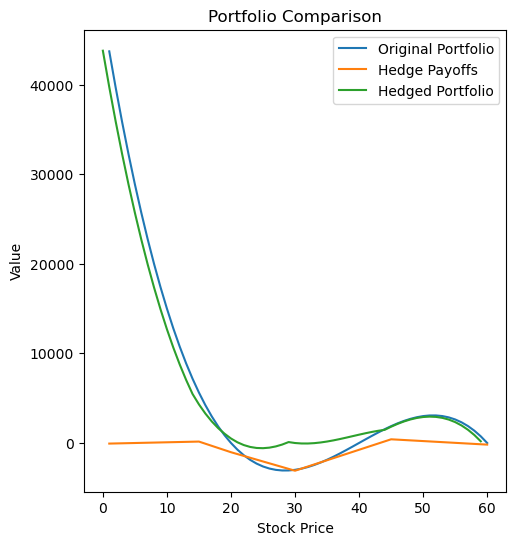

In [47]:
# Plot results
plt.figure(figsize=(12, 6))

# Original vs Hedged Portfolio
plt.subplot(1, 2, 1)
plt.plot(stocks, portfolio, label='Original Portfolio')
plt.plot(stocks, option_payoff, label='Hedge Payoffs')
plt.plot(after_surgery, label = 'Hedged Portfolio')
plt.title('Portfolio Comparison')
plt.xlabel('Stock Price')
plt.ylabel('Value')
plt.legend()

In [ ]:
"""
Essentially, fellas, we are going to buy: 
    206.60567508 calls with the strike price of $15 
    273.48442368 calls with the strike price of $45
    46.98010183 puts with the strike price of $15

And, we are going to short: 
    440.49083973 calls with the strike price of $30 
    30.96415802 puts with the strike price of $20

The negative b values show that the corresponding options have an inverse relationship with the negative part of the portfolio.
The opposite is true for the positive b values, since their options have a positive relationship with losses.
Mathematically, it can be shown when we subtract X * b from the portfolio. 
Subtracting a negative is adding, and subtracting a positive is subtracting. :P
"""